<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.2 Modelos deterministas de segundo orden </h3>
<h3 style="text-align: center;"> Ejercicios 2 </h3>

### Ejercicio 2 (Farmacocinética: Absorción de la droga)

En medicina, es importante conocer lo rápido que la droga entra en la sangre y cómo esa concentración evoluciona en el tiempo. 

Este modelo explica de una forma simple este fenómeno. Vamos a considerar dos variables de estado: $G(t)$, que representa la concentración de droga en el tracto intestinal en el tiempo $t$, y $B(t)$, que indica la concentración de droga en la sangre (en microgramos por ml). Si se suministra una dosis vía oral de $D(t)$ microgramos por ml, la dinámica del sistema se puede describir de la siguiente manera: 

$$\begin{array}{l} \frac{dG}{dt} = -aG+D(t),\\ \frac{dB}{dt} = aG-bB,\end{array}$$

donde $a$ y $b$ son parámetros positivos. Por tanto, estas ecuaciones indican que cada periodo de tiempo (horas) un porcentaje $a$ de la droga en el tracto digestivo se incorpora a la concentración de droga en sangre, mientras que en el mismo periodo de tiempo un porcentaje $b$ de la droga en sangre decae y desaparece. 

**(a)** Simular la cantidad de droga en el tracto y en sangre en 72 horas. La droga se suministra en una toma cada 6 horas de 2 microgramos por ml. Asumir inicialmente $a=\ln(2)/2$, y $b=\ln(2)/5$, que son los parámetros sugeridos por la literatura.  

**(b)** Tras el suministro de la dosificación a una persona determinada, se observó que la concentración en sangre de esa droga oscilaba entre unos valores de 3.4 y 4.5 microgramos por ml. Ajustar los parámetros del modelo para que la simulación en el equilibrio alcance esos valores. 

**(c)** Para el caso anterior, ajustar la cantidad y frecuencia adecuada de ingestión de la droga para que la concentración de droga estable se encuentre entre 3 y 3.2 microgramos por ml. 


#### Solución Ejercicio 2 (a)

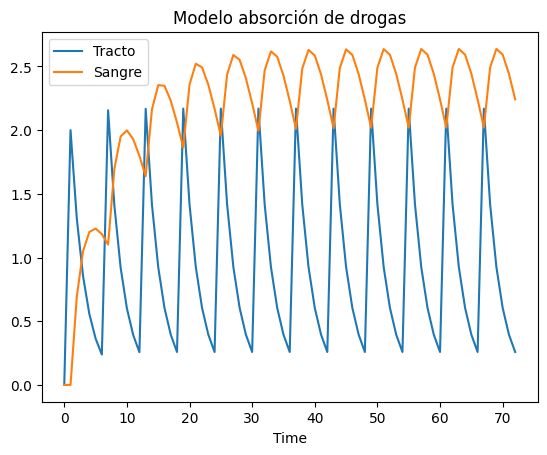

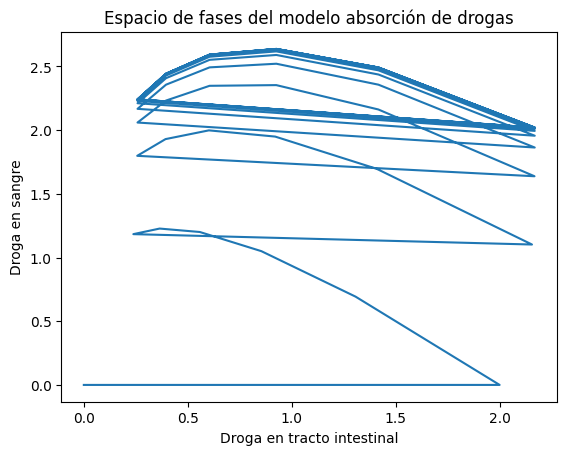

In [1]:
###LIBRERÍAS
##-------------------------------
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

"""" definición del modelo"""

def sys(x, t, D,a,b):
    dGdt=-a*x[0]+D #rate of change of blood glucose 
    dBdt=a*x[0]-b*x[1]  #rate of change of concentration of insulin in the tissue fluid
    return np.array([dGdt, dBdt])

"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=72
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado"""
G0 = 0  # datos de concentración de droga en el tracto intestinal
B0 = 0 # datos de concentración de droga en sangre
x0 = np.array([G0, B0])


"""" definición de los parámetros"""
a= np.log(2)/2 #valores sugeridos en la literatura
b= np.log(2)/5 #valores sugeridos en la literatura

from scipy.signal import unit_impulse

dosis=2
temp=6
D=dosis*unit_impulse(len(t),list(range(0,len(t),temp)))


"""" aplicando el método de euler"""

def solveODE_euler(f, x0, t, D, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], D[i],*arg)
    return x

sol = solveODE_euler(sys, x0, t, D, arg=(a,b))


""""gráficas"""

G_sim=sol[:,0]
B_sim=sol[:,1]

# visualization of glucose concentration
plt.plot(t, G_sim)
plt.plot(t, B_sim)
plt.legend(('Tracto','Sangre'))
plt.xlabel('Time')
plt.title('Modelo absorción de drogas')
plt.show()

# deterministic phase portrait
plt.plot(G_sim,B_sim)
plt.xlabel('Droga en tracto intestinal')
plt.ylabel('Droga en sangre')
plt.title('Espacio de fases del modelo absorción de drogas')
plt.show()


Como se puede observar, la droga se ingiere y posteriormente se transfiere a la sangre hasta estabilizarse en unos parámetros entre 2 y 2.7 microgramos por ml. La simulación del modelo puede ayudar a ajustar la dosificación para mantener ciertas concentraciones de droga en la sangre, como se verá en los siguientes apartados.

#### Solución Ejercicio 2 (b)

En este caso, se observó que la concentración en sangre de esa droga oscilaba entre unos valores de 3.4 y 4.5 microgramos por ml y trataremos de ajustar los parámetros del modelo para que represente esta situación. 

En primer lugar intentamos calcular los valores de los parámetros de una forma automática utilizando la instrucción *leastsq*. Para ello fijamos los máximos y los mínimos en la concentración de droga en sangre en el equilibrio (que asumimos después de 8 dosis) son los indicados arriba, e intentamos ajustar la simulación de la ecuación diferencial a esos datos.  

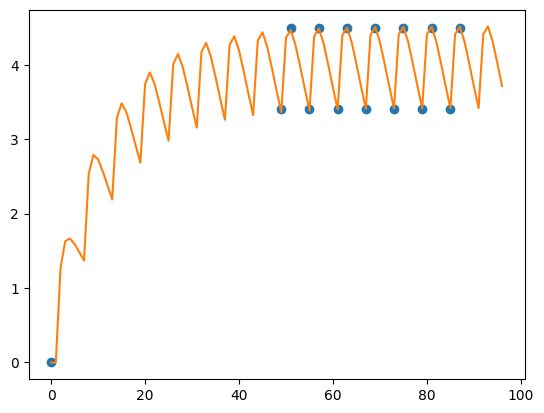

a_opt: 0.64
b_opt: 0.08


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

"""" definición del modelo"""

def sys(x, t, D,a,b):
    dGdt=-a*x[0]+D #rate of change of blood glucose 
    dBdt=a*x[0]-b*x[1]  #rate of change of concentration of insulin in the tissue fluid
    return np.array([dGdt, dBdt])

"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=96
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado"""
G0 = 0  # datos de concentración de droga en el tracto intestinal
B0 = 0 # datos de concentración de droga en sangre
x0 = np.array([G0, B0])


"""" definición de los parámetros"""
a= np.log(4)/2 #valores sugeridos en la literatura
b= np.log(1.5)/5 #valores sugeridos en la literatura


from scipy.signal import unit_impulse

dosis=2
temp=6
D=dosis*unit_impulse(len(t),list(range(0,len(t),temp)))

"""" datos experimentales"""

#Enter 3.4 y 4.5 en la fase estable. 
tdata_min=range(temp*8+1,temp*15+1,temp)
tdata_min = np.array(tdata_min, dtype=int)
tdata_min = np.append(tdata_min,0)

tdata_max=range(temp*8+3,temp*15+3,temp)
tdata_max = np.array(tdata_max, dtype=int)

tdata=np.sort(np.concatenate([tdata_min,tdata_max]))

Bdata_min=3.4
Bdata_max=4.5
Bdata=[Bdata_min,Bdata_max]*7
Bdata=np.array(Bdata,dtype=float)
Bdata=np.append(0,Bdata)

df_Bdata=pd.DataFrame(data=Bdata,index=tdata)


"""Utilizando least_squares"""

params=(a,b) #Cambio de a0 y b0 a a y b
def error_func(params, data):
    #print(params)
    a0, b0 = params
    sol = solveODE_euler(sys, x0, t, D, arg=(a0,b0))[:,1]
    errors = sol[data.index]-data.iloc[:,0]
    return errors

best_params, fit_details = optimize.leastsq(error_func, params, df_Bdata)

a_opt, b_opt = best_params

B_sim = solveODE_euler(sys, x0, t, D, arg=(a_opt,b_opt))[:,1]

plt.plot(tdata, Bdata, 'o')
plt.plot(t, B_sim)
plt.show()

print(f"a_opt: {a_opt:.2f}")
print(f"b_opt: {b_opt:.2f}")

Como se puede observar, se ha obtenido un buen ajuste. 

### Ejercicio 2 (c) 

En este caso se trata de optimizar los parámetros de la dosis y temporización para ajustarnos a una concentración en sangre entre 3 y 3.2 microgramos por ml. En primer lugar lo intentamos hacer automáticamente. Para eso hay que incluir estos parámetros en la definición de la función, por lo que la forma de introducir la dosificación cambia. 

[2 6]
[2. 6.]
[2. 6.]
[2.00000003 6.        ]
[2.         6.00000009]
[17.72631268  6.00000073]
[3.3600997  6.00000008]


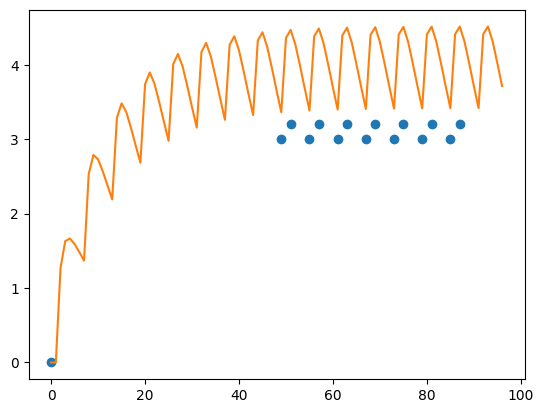

In [3]:
def sys(x, t, dosis, temp, a, b):
    if t % temp == 0:
        D=dosis
    else:
        D=0
    dGdt=-a*x[0]+D #rate of change of blood glucose 
    dBdt=a*x[0]-b*x[1]  #rate of change of concentration of insulin in the tissue fluid
    return np.array([dGdt, dBdt])

"""" definición del intervalo de tiempo"""

timestep = 1
t0=0
tf=96
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado"""
G0 = 0  # datos de concentración de droga en el tracto intestinal
B0 = 0 # datos de concentración de droga en sangre
x0 = np.array([G0, B0])

"""" definición de los parámetros"""
#a=a_opt
a=np.log(4)/2
#b=b_opt
b=np.log(1.5)/5

dosis_in=2
temp_in=6

#Enter 3 y 3.2 en la fase estable. 
tdata_min=range(temp_in*8+1,temp_in*15+1,temp_in)
tdata_min = np.array(tdata_min, dtype=int)
tdata_min = np.append(tdata_min,0)

tdata_max=range(temp_in*8+temp_in//dosis_in,temp_in*15+temp_in//dosis_in,temp_in)
tdata_max = np.array(tdata_max, dtype=int)

tdata=np.sort(np.concatenate([tdata_min,tdata_max]))

Bdata_min=3
Bdata_max=3.2
Bdata=[Bdata_min,Bdata_max]*7
Bdata=np.array(Bdata,dtype=float)
Bdata=np.append(0,Bdata)

df_Bdata=pd.DataFrame(data=Bdata,index=tdata)

"""Utilizando least_squares"""

def solveODE_euler1(f, x0, t, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

params=(dosis_in,temp_in)
def error_func(params, data):
    print(params)
    dosis, temp = params
    sol = solveODE_euler1(sys, x0, t, arg=(dosis,temp,a,b))[:,1]
    errors = sol[data.index]-data.iloc[:,0]
    return errors

best_params, fit_details = optimize.leastsq(error_func, params, df_Bdata)

dosis_opt, temp_opt = best_params

B_sim = solveODE_euler1(sys, x0, t, arg=(dosis_opt,temp_opt,a_opt,b_opt))[:,1]

plt.plot(tdata, Bdata, 'o')
plt.plot(t, B_sim)
plt.show()


La instrucción *leastsq* no es adecuada para encontrar los valores de los parámetros óptimos. Para afinar el ajuste mejor, habría que redefinir los momentos del tiempo en el que se alcanzan los máximos y mínimos de concentración en sangre según los valores de dosis y temporización (se deja como ejercicio). 

Por ensayo y error obtenemos una buena aproximación.

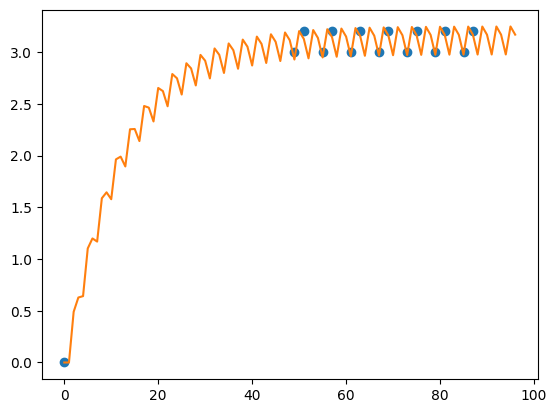

In [ ]:
#valores por ensayo y error
dosis_opt=0.77
temp_opt=3

B_sim = solveODE_euler1(sys, x0, t, arg=(dosis_opt,temp_opt,a_opt,b_opt))[:,1]

plt.plot(tdata, Bdata, 'o')
plt.plot(t, B_sim)
plt.show()